In [151]:
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from collections import defaultdict
%matplotlib inline
from helper import *

Setting the font sizes for various items in plotting the figures

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Importing the data
- The data being imported corresponds to benchmark point BP5 for type II 2HDM,

   $$M_{H^+}=548 GeV, M_A=258 GeV, \tan\beta= 44, \sin(\beta-\alpha)=0.99$$ 
   
- twbb_sig.json -> signal events
- twbb_bck.json -> background events
- twbb_tot.json -> signal + background + interference events

In [3]:
dta_sig = pd.read_json('twbb_sig.json',orient='records')
dta_bck = pd.read_json('twbb_bck.json',orient='records')
dta_tot = pd.read_json('twbb_tot.json',orient='records')

## Data Cleaning
All those events which contain there nan values are removed from the event list. For this purpose, a function 'remove_nan_events()' is included in the helper.py module. This function takes the data files and returns cleaned data file, i.e., after all nan values have been removed and a list which give the event numbers which have been purged.

In [4]:
dta_sig,deleted_events_sig = remove_nan_events(dta_sig)
dta_bck,deleted_events_bck = remove_nan_events(dta_bck)
dta_tot,deleted_events_tot = remove_nan_events(dta_tot)

### CUT-2: Cut on the number of jets in the event.

For our process, we expect at least 5 jets at the detector out of which 3 should be b-tagged and remaining are light jets. In the following cut, we just impose to have events where total number of jets are larger or equal to 5. Note that the a cut regarding only one lepton has already been implemented in the json data files.

In [5]:
dta_sig=dta_sig.loc[dta_sig['Jet'].map(len)>4,:]
dta_sig.reset_index(drop=True,inplace=True)

dta_bck=dta_bck.loc[dta_bck['Jet'].map(len)>4,:]
dta_bck.reset_index(drop=True,inplace=True)

dta_tot=dta_tot.loc[dta_tot['Jet'].map(len)>4,:]
dta_tot.reset_index(drop=True,inplace=True)

In [6]:
n_sig_2=len(dta_sig)
n_bck_2=len(dta_bck)
n_tot_2=len(dta_tot)

print('{:>45}{:>16}{:>14}'.format('Signal','Background','Total'))
print('Number of events after Cut-2:{:15}{:15}{:15}'.format(n_sig_2,n_bck_2,n_tot_2))

                                       Signal      Background         Total
Number of events after Cut-2:          15421           8253           8279


## Plotting the distributions
In the following, we use Dist_plot() function to plot the distributions for various objects in the events. Dist_plot() has been defined in helper.py module and it performs following tasks:
- The function takes inputs of list of four momenta corresponding to a object for a number of events for two different processes, i.e., signal and total in the following illustration
- It then plots distribution corresponding to transverse momentum $p_T$, pseudo-rapidity $\eta$ and Energy $E$ of the objects for each process

/usr/lib64/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


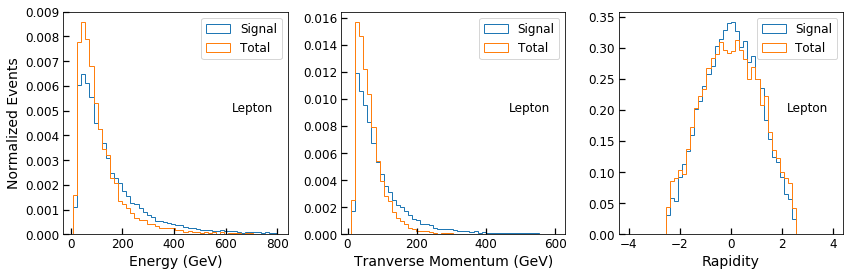

In [7]:
Dist_plot(dta_sig['Lepton'],dta_tot['Lepton'],(12,4),'Lepton',[10,800],[10,600])

In [8]:
def jet_vars(dta):
    Jet_1=[]
    Jet_2=[]
    Jet_3=[]
    Jet_4=[]
    Jet_5=[]

    for i in range(len(dta)):
        
        if(type(dta['Jet'][i]) is list and len(dta['Jet'][i])>4):
            Jet_1.append(dta['Jet'][i][0])
            Jet_2.append(dta['Jet'][i][1])
            Jet_3.append(dta['Jet'][i][2])        
            Jet_4.append(dta['Jet'][i][3])
            Jet_5.append(dta['Jet'][i][4])
        
    Jet_1=pd.Series(Jet_1) 
    Jet_2=pd.Series(Jet_2) 
    Jet_3=pd.Series(Jet_3) 
    Jet_4=pd.Series(Jet_4) 
    Jet_5=pd.Series(Jet_5)
    return Jet_1,Jet_2,Jet_3,Jet_4,Jet_5

In [9]:
Jet_1_sig,Jet_2_sig,Jet_3_sig,Jet_4_sig,Jet_5_sig = jet_vars(dta_sig)
Jet_1_bck,Jet_2_bck,Jet_3_bck,Jet_4_bck,Jet_5_bck = jet_vars(dta_bck)
Jet_1_tot,Jet_2_tot,Jet_3_tot,Jet_4_tot,Jet_5_tot = jet_vars(dta_tot)

In [10]:
Lepton_sig=dta_sig['Lepton'].apply(pd.Series)
Lepton_bck=dta_bck['Lepton'].apply(pd.Series)
Lepton_tot=dta_tot['Lepton'].apply(pd.Series)

Lepton_sig.columns=['pT','Eta','Phi','PId']
Lepton_bck.columns=['pT','Eta','Phi','PId']
Lepton_tot.columns=['pT','Eta','Phi','PId']

In [89]:
Lepton={'sig':Lepton_sig,'bck':Lepton_bck,'tot':Lepton_tot}

In [11]:
Jet_1_sig=Jet_1_sig.apply(pd.Series)
Jet_2_sig=Jet_2_sig.apply(pd.Series)
Jet_3_sig=Jet_3_sig.apply(pd.Series)
Jet_4_sig=Jet_4_sig.apply(pd.Series)
Jet_5_sig=Jet_5_sig.apply(pd.Series)

Jet_1_sig.columns=['pT','Eta','Phi','BTag']
Jet_2_sig.columns=['pT','Eta','Phi','BTag']
Jet_3_sig.columns=['pT','Eta','Phi','BTag']
Jet_4_sig.columns=['pT','Eta','Phi','BTag']
Jet_5_sig.columns=['pT','Eta','Phi','BTag']

In [12]:
Jet_1_bck=Jet_1_bck.apply(pd.Series)
Jet_2_bck=Jet_2_bck.apply(pd.Series)
Jet_3_bck=Jet_3_bck.apply(pd.Series)
Jet_4_bck=Jet_4_bck.apply(pd.Series)
Jet_5_bck=Jet_5_bck.apply(pd.Series)

Jet_1_bck.columns=['pT','Eta','Phi','BTag']
Jet_2_bck.columns=['pT','Eta','Phi','BTag']
Jet_3_bck.columns=['pT','Eta','Phi','BTag']
Jet_4_bck.columns=['pT','Eta','Phi','BTag']
Jet_5_bck.columns=['pT','Eta','Phi','BTag']

In [13]:
Jet_1_tot=Jet_1_tot.apply(pd.Series)
Jet_2_tot=Jet_2_tot.apply(pd.Series)
Jet_3_tot=Jet_3_tot.apply(pd.Series)
Jet_4_tot=Jet_4_tot.apply(pd.Series)
Jet_5_tot=Jet_5_tot.apply(pd.Series)

Jet_1_tot.columns=['pT','Eta','Phi','BTag']
Jet_2_tot.columns=['pT','Eta','Phi','BTag']
Jet_3_tot.columns=['pT','Eta','Phi','BTag']
Jet_4_tot.columns=['pT','Eta','Phi','BTag']
Jet_5_tot.columns=['pT','Eta','Phi','BTag']

In [87]:
Jet_1={'sig':Jet_1_sig, 'bck':Jet_1_tot, 'tot':Jet_1_tot}
Jet_2={'sig':Jet_2_sig, 'bck':Jet_2_tot, 'tot':Jet_2_tot}
Jet_3={'sig':Jet_3_sig, 'bck':Jet_3_tot, 'tot':Jet_3_tot}
Jet_4={'sig':Jet_4_sig, 'bck':Jet_4_tot, 'tot':Jet_4_tot}
Jet_5={'sig':Jet_5_sig, 'bck':Jet_5_tot, 'tot':Jet_5_tot}

In [ ]:
figsize=(12,4)
label_1='Jet_1'
range_1=[10,1000]
range_2=[10,800]

Dist_plot(Jet_1_bck,Jet_1_tot,figsize,label_1,range_1,range_2)
Dist_plot(Jet_2_bck,Jet_2_tot,(12, 4),'Jet_2',[10,1000],[10,600])
Dist_plot(Jet_3_bck,Jet_3_tot,(12, 4),'Jet_3',[10,800],[10,500])
Dist_plot(Jet_4_bck,Jet_4_tot,(12, 4),'Jet_4',[10,700],[10,400])
Dist_plot(Jet_5_bck,Jet_5_tot,(12, 4),'Jet_5',[10,600],[10,300])

In [ ]:
Dist_plot(Jet_1_sig,Jet_1_tot,(12, 4),'Jet_1')
Dist_plot(Jet_2_sig,Jet_2_tot,(12, 4),'Jet_2')
Dist_plot(Jet_3_sig,Jet_3_tot,(12, 4),'Jet_3')
Dist_plot(Jet_4_sig,Jet_4_tot,(12, 4),'Jet_4')
Dist_plot(Jet_5_sig,Jet_5_tot,(12, 4),'Jet_5')

In [37]:
def get_btag_prob(Jets):
    b_tag_prob=[]
    for e in Jets:
        n_btag=0
        n_no_tag=0
        for i in range(len(e)):
            if e['BTag'][i] == 1.0:
                n_btag = n_btag + 1
            else :
                n_no_tag = n_no_tag + 1
        b_tag_prob.append(n_btag/len(e))
    return b_tag_prob 

In [19]:
Jets_sig=[Jet_1_sig,Jet_2_sig,Jet_3_sig,Jet_4_sig,Jet_5_sig]
Jets_bck=[Jet_1_bck,Jet_2_bck,Jet_3_bck,Jet_4_bck,Jet_5_bck]
Jets_tot=[Jet_1_tot,Jet_2_tot,Jet_3_tot,Jet_4_tot,Jet_5_tot]

In [38]:
b_tag_prob_sig=get_btag_prob(Jets_sig)
b_tag_prob_bck=get_btag_prob(Jets_bck)
b_tag_prob_tot=get_btag_prob(Jets_tot)

### We now calculate the probability of tagging b-jets for first 5 hard jets in an event for signal and background processes.

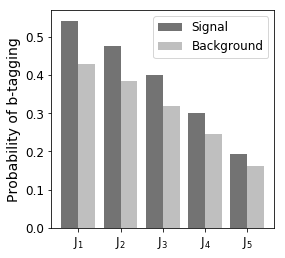

In [63]:
fig,ax=plt.subplots(figsize=(4,4))
num_of_jets=5
index=np.arange(num_of_jets)
width=0.4

ax.bar(index,b_tag_prob_sig,width, alpha=0.55,color='black')
ax.bar(index+width,b_tag_prob_bck,width,alpha=0.25,color='black')

ax.set_xticks(index+width/2.0 )
ax.set_xticklabels( (r'J$_1$', r'J$_2$', r'J$_3$', r'J$_4$', r'J$_5$'))
ax.set_ylabel('Probability of b-tagging')
ax.legend(('Signal','Background'))

## Calculating the longtudinal momentum of the missing neutrino

In [81]:
Missing_ET_sig=dta_sig['Missing_ET'].apply(pd.Series)
Missing_ET_bck=dta_bck['Missing_ET'].apply(pd.Series)
Missing_ET_tot=dta_tot['Missing_ET'].apply(pd.Series)

Missing_ET_sig.columns=['pT','Eta','Phi']
Missing_ET_bck.columns=['pT','Eta','Phi']
Missing_ET_tot.columns=['pT','Eta','Phi']

In [91]:
MET={'sig':Missing_ET_sig,'bck':Missing_ET_bck,'tot':Missing_ET_tot}

In [93]:
MW=80.301

for i in range(1):
    px_nu=MET['sig']['pT'][i]*math.cos(MET['sig']['Phi'][i])
    py_nu=MET['sig']['pT'][i]*math.sin(MET['sig']['Phi'][i])

    met=MET['sig']['pT'][i]

    px_lep=Lepton['sig']['pT'][i]*math.cos(Lepton['sig']['Phi'][i])
    py_lep=Lepton['sig']['pT'][i]*math.sin(Lepton['sig']['Phi'][i])
    pz_lep=Lepton['sig']['pT'][i]*math.sinh(Lepton['sig']['Eta'][i])
    E_lep =Lepton['sig']['pT'][i]*math.cosh(Lepton['sig']['Eta'][i])

    P_lep=math.sqrt(px_lep**2 + py_lep**2 + pz_lep**2)
    P_lep_T=Lepton['sig']['pT'][i]

    AW=MW**2 + 2.0*(px_lep*px_nu + py_lep*py_nu)
    Discrim=AW**2 - 4.0*(P_lep_T*met)**2

    if Discrim>0:
        pz_nu_p=(0.5/(P_lep_T**2))*(AW*pz_lep + E_lep*math.sqrt(Discrim))
        pz_nu_m=(0.5/(P_lep_T**2))*(AW*pz_lep - E_lep*math.sqrt(Discrim))

        E_nu_p=math.sqrt(pz_nu_p**2 + met**2)
        E_nu_m=math.sqrt(pz_nu_m**2 + met**2)

        p_nu_p=[px_nu,py_nu,pz_nu_p,E_nu_p]
        p_nu_m=[px_nu,py_nu,pz_nu_m,E_nu_m]
    
        px_W = px_nu + px_lep
        py_W = py_nu + py_lep
        
        pz_W_p = pz_nu_p + pz_lep
        E_W_p  = E_nu_p + E_lep
        
        pz_W_m = pz_nu_m + pz_lep
        E_W_m  = E_nu_m + E_lep
        
        p_W_p = [px_W,py_W,pz_W_p,E_W_p]
        p_W_m = [px_W,py_W,pz_W_m,E_W_m]


In [98]:
print(get_invariant_mass(p_nu_p,dta_sig['Lepton'][0]),get_invariant_mass(p_W_m))

67.10372316650056 80.30100000000004


In [141]:
DelR=defaultdict(pd.DataFrame)
for e in ['sig','bck','tot']:
    DelR[e]=pd.DataFrame({'DelR12':(Jet_1[e]['Eta']-Jet_2[e]['Eta']),
                       'DelR13':(Jet_1[e]['Eta']-Jet_3[e]['Eta']),
                       'DelR14':(Jet_1[e]['Eta']-Jet_4[e]['Eta']),
                       'DelR23':(Jet_2[e]['Eta']-Jet_3[e]['Eta']),
                       'DelR24':(Jet_2[e]['Eta']-Jet_4[e]['Eta'])})

(array([ 0.00061914,  0.00371483,  0.00247655,  0.00742966,  0.00990622,
         0.01238277,  0.01733588,  0.02971865,  0.02909951,  0.03652918,
         0.05076937,  0.06005645,  0.06005645,  0.08544113,  0.0897751 ,
         0.11515978,  0.11082581,  0.15540379,  0.18636072,  0.19069469,
         0.21607937,  0.24517889,  0.24827458,  0.24270233,  0.25756166,
         0.26189563,  0.25260855,  0.25879994,  0.24084492,  0.24641717,
         0.20741143,  0.18636072,  0.1795502 ,  0.13868705,  0.12444686,
         0.0978239 ,  0.10401529,  0.07243922,  0.06315214,  0.05262678,
         0.04024401,  0.03652918,  0.02600382,  0.02043157,  0.02352727,
         0.01176363,  0.00990622,  0.00309569,  0.00185742,  0.00185742]),
 array([-4.91845155, -4.7233619 , -4.52827225, -4.3331826 , -4.13809295,
        -3.9430033 , -3.74791365, -3.552824  , -3.35773435, -3.1626447 ,
        -2.96755505, -2.7724654 , -2.57737575, -2.3822861 , -2.18719645,
        -1.9921068 , -1.79701715, -1.6019275 , -1

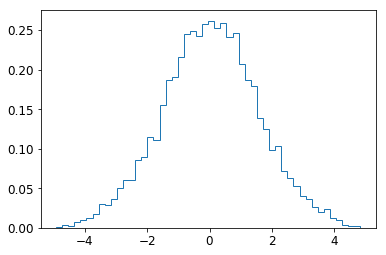

In [150]:
plt.hist(DelR['tot']['DelR12'] ,bins=50,histtype='step',normed=True)

In [ ]:
lst_pT={}
lst_Eta={}
lst_Phi={}
lst_bTag={}

for i in range(100):
    for j in range(len(dta_sig['Jet'][i])):
        lst_pT[str(j)]=list(dta_sig['Jet'][i][0][0])


In [ ]:
lst_pT

In [ ]:
Jet={}
Jet[str(1)]=pd.DataFrame({'PT':lst_pT,'Eta':lst_Eta,'Phi':lst_Phi,'bTag':lst_bTag})

In [ ]:
dta_sig['Jet'][0][0]

In [ ]:
from pandas.io.json import json_normalize
with open('twbb_sig.json') as file:
    data=json.load(file)
json_normalize(data,'Lepton','Jet',)

In [ ]:
df = pd.DataFrame.from_dict(dta_sig, orient='columns')

In [ ]:
jet_id=1
lst_PT,lst_Eta,lst_Phi,lst_BTag=[],[],[],[]
for i in range(len(dta_sig['Jet'])):
    lst_PT.append(df['Jet'][i][jet_id][0])
    lst_Eta.append(df['Jet'][i][jet_id][1])
    lst_Phi.append(df['Jet'][i][jet_id][2])
    lst_BTag.append(df['Jet'][i][jet_id][3])
    
Jet[str(jet_id+1)]=pd.DataFrame({'PT':lst_PT,'Eta':lst_Eta,'Phi':lst_Phi,'bTag':lst_BTag})    